# Section 5.2
## Handle the dataset
Data is stored in project root directory under datsets and a small subset is copied to chapter directory/datasets. It is split into 1000, 500, 500 train validate and test samples each in its own folder.

NOTE: add commands that will use kagggle api to pull data.

In [1]:
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
import os, shutil

/home/ante/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:


def create_dir_if_not_existing(dir_name):
    # This function cretes a directory if it does not exist otherwise it prints that it exists and continues.
    try:
        os.mkdir(dir_name) 
    except FileExistsError:
        print(f'Directory:"{dir_name}" already exists, continuing.')
    
original_dataset_dir = '../datasets/dogs-vs-cats/train'
# Create directories.
base_dir = './datasets/cats_and_dogs_small'
create_dir_if_not_existing(base_dir)

train_dir = os.path.join(base_dir, 'train') 
create_dir_if_not_existing(train_dir)

validation_dir = os.path.join(base_dir, 'validation') 
create_dir_if_not_existing(validation_dir)

test_dir = os.path.join(base_dir, 'test') 
create_dir_if_not_existing(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats') 
create_dir_if_not_existing(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') 
create_dir_if_not_existing(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') 
create_dir_if_not_existing(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
create_dir_if_not_existing(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') 
create_dir_if_not_existing(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') 
create_dir_if_not_existing(test_dogs_dir)

# Split [train valdiate test] as [1000].
def copy_datset(fnames,src_dir,dst_dir):
    for fname in fnames:
        src = os.path.join(src_dir, fname)
        dst = os.path.join(dst_dir, fname)
        shutil.copyfile(src,dst)
       

Directory:"./datasets/cats_and_dogs_small" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small/train" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small/validation" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small/test" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small/train/cats" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small/train/dogs" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small/validation/cats" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small/validation/dogs" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small/test/cats" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small/test/dogs" already exists, continuing.


In [3]:
# Copy dataset to target directories.
# THIS SHOULD BE DONE ONCE!.
# copy_datset([f'cat.{i}.jpg' for i in range(1000)], original_dataset_dir, train_cats_dir)
# copy_datset([f'dog.{i}.jpg' for i in range(1000)], original_dataset_dir, train_dogs_dir)

# copy_datset([f'cat.{i}.jpg' for i in range(1000,1500)], original_dataset_dir, validation_cats_dir)
# copy_datset([f'dog.{i}.jpg' for i in range(1000,1500)], original_dataset_dir, validation_dogs_dir)

# copy_datset([f'cat.{i}.jpg' for i in range(1500,2000)], original_dataset_dir, test_cats_dir)
# copy_datset([f'dog.{i}.jpg' for i in range(1500,2000)], original_dataset_dir, test_dogs_dir)

In [4]:
# Check number of images.
print(f"Train cat images:{len(os.listdir(train_cats_dir))}")
print(f"Train dog images:{len(os.listdir(train_dogs_dir))}")
print(f"Validation cat images:{len(os.listdir(validation_cats_dir))}")
print(f"Validation dog images:{len(os.listdir(validation_dogs_dir))}")
print(f"Test cat images:{len(os.listdir(test_cats_dir))}")
print(f"Test dog images:{len(os.listdir(test_dogs_dir))}")

Train cat images:1000
Train dog images:1000
Validation cat images:500
Validation dog images:500
Test cat images:500
Test dog images:500


NOTE: since we have a balanced number of cats and dogs in a dataset accutracy is a valid meaure of succses (this is a balanced binary calssification problem)

## Preprocess data by using data generators.


In [5]:
# These are generators that can be used to create set up generators that will iterate over images in data folders.
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

def make_image_generator(datagen,directory):
    return datagen.flow_from_directory(directory,
                                       target_size=(150, 150), 
                                       batch_size=20, 
                                       class_mode='binary')

# These are the generators that will generate the training images themselfs.
train_generator = make_image_generator(train_datagen, train_dir)
validation_generator = make_image_generator(validation_datagen, validation_dir)
test_generator = make_image_generator(test_datagen, test_dir)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Create network

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.rmsprop(lr=1e-4), metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

# Train the network using generators

In [7]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_1.h5')
(test_loss, test_acc) = model.evaluate_generator(test_generator, steps=50)

Epoch 1/30
100/100 [==============================] - 9s 94ms/step - loss: 0.6884 - acc: 0.5310 - val_loss: 0.6694 - val_acc: 0.6250
Epoch 2/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6500 - acc: 0.6195 - val_loss: 0.6316 - val_acc: 0.6410
Epoch 3/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6054 - acc: 0.6760 - val_loss: 0.6282 - val_acc: 0.6400
Epoch 4/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5694 - acc: 0.6995 - val_loss: 0.6183 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5497 - acc: 0.7090 - val_loss: 0.6025 - val_acc: 0.6690
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5190 - acc: 0.7355 - val_loss: 0.6104 - val_acc: 0.6740
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 0.4979 - acc: 0.7530 - val_loss: 0.5854 - val_acc: 0.6860
Epoch 8/30
100/100 [==============================] - 8s 77ms/step - 

In [8]:
def plot_history(history):
    def plot_history_record(history, record, *args, **kwargs):
        values = history.history[record]
        epochs = range(1, len(values) + 1)
        plt.plot(epochs, values, *args, **kwargs)

    plot_history_record(history, 'loss', 'bo', label='Training loss')
    plot_history_record(history, 'val_loss', 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.figure()
    plot_history_record(history, 'acc', 'bo', label='Training accuracy')
    plot_history_record(history, 'val_acc', 'b', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

This model achieved 74.30% accuracy on test data.


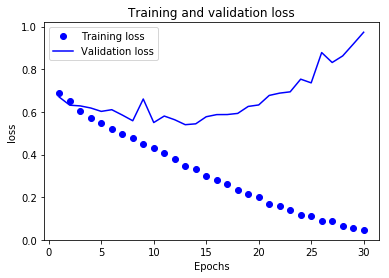

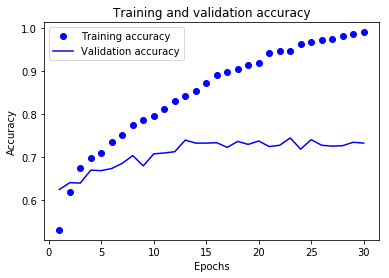

In [9]:
plot_history(history)
print(f"This model achieved {test_acc * 100:.2f}% accuracy on test data.")

## Use data augmentation
Previous example overfit severly and reached accuracy of 73.5%. We will use data augmentation to increase the variation of our dataset. It applies a series of simple transforms to images in dataset so no two used images will be the same(but they will still be simmilar).

In [10]:
from keras.preprocessing.image import ImageDataGenerator
# These are generators that can be used to create set up generators that will iterate over images in data folders.
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

Plot a random cat image transformed 4 times.

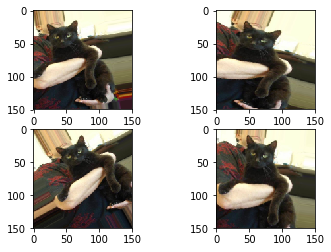

In [11]:
fnames =  [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
i = np.random.randint(0,len(fnames))
img_path = fnames[i]
# Load an PIL image and transform it into a numpy array with a batch dimension.
img = image.load_img(img_path,target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 1
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break
plt.show()

Since we have a small dataset add a dropout layer to the model.

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.rmsprop(lr=1e-4), metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [13]:
# Train datagenapplys augmentation and the test (validation) does not.
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


# These are the generators that will generate the training images themselfs.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6902 - acc: 0.5475 - val_loss: 0.6772 - val_acc: 0.5387
Epoch 2/100
100/100 [==============================] - 17s 175ms/step - loss: 0.6752 - acc: 0.5675 - val_loss: 0.7067 - val_acc: 0.5197
Epoch 3/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6607 - acc: 0.6003 - val_loss: 0.6601 - val_acc: 0.5774
Epoch 4/100
100/100 [==============================] - 18s 183ms/step - loss: 0.6465 - acc: 0.6162 - val_loss: 0.6720 - val_acc: 0.5806
Epoch 5/100
100/100 [==============================] - 17s 174ms/step - loss: 0.6290 - acc: 0.6350 - val_loss: 0.6194 - val_acc: 0.6377
Epoch 6/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6114 - acc: 0.6644 - val_loss: 0.5905 - val_acc: 0.6821
Epoch 7/100
100/100 [==============================] - 17s 175ms/step - loss: 0.6040 - acc: 0.6662 - val_loss: 0.5678 - val_acc: 0.6973
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 17s 174ms/step - loss: 0.4140 - acc: 0.8087 - val_loss: 0.5158 - val_acc: 0.7570
Epoch 62/100
100/100 [==============================] - 18s 180ms/step - loss: 0.3951 - acc: 0.8141 - val_loss: 0.5231 - val_acc: 0.7418
Epoch 63/100
100/100 [==============================] - 17s 174ms/step - loss: 0.3925 - acc: 0.8178 - val_loss: 0.4879 - val_acc: 0.7481
Epoch 64/100
100/100 [==============================] - 17s 174ms/step - loss: 0.3937 - acc: 0.8206 - val_loss: 0.4535 - val_acc: 0.8020
Epoch 65/100
100/100 [==============================] - 17s 175ms/step - loss: 0.3953 - acc: 0.8194 - val_loss: 0.4684 - val_acc: 0.7881
Epoch 66/100
100/100 [==============================] - 17s 173ms/step - loss: 0.3992 - acc: 0.8112 - val_loss: 0.4039 - val_acc: 0.8261
Epoch 67/100
100/100 [==============================] - 18s 181ms/step - loss: 0.3970 - acc: 0.8225 - val_loss: 0.4330 - val_acc: 0.8179
Epoch 68/100
100/100 [===================

This model achieved 81.79% accuracy on test data.


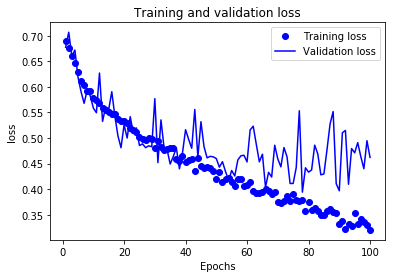

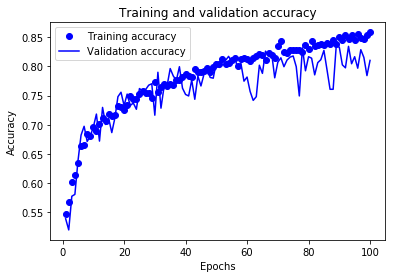

In [15]:
(test_loss, test_acc) = model.evaluate_generator(test_generator, steps=50)
plot_history(history)
print(f"This model achieved {test_acc * 100:.2f}% accuracy on test data.")

Something seams to have gone wrong during training, should recheck on stronger hardware.